In [1]:
!pip install python-docx prettytable Pillow


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import docx
from docx import Document
from prettytable import PrettyTable
import PIL
from PIL import Image

In [3]:
def open_docx(docx: str) -> Document:
    return Document(docx)

In [4]:
def all_tables(docx: Document) -> list:
    return docx.tables

In [5]:
def get_table(tables: list, index: int) -> tuple[list[str], list[list[str]]]:
    table = tables[index]
    rows = table.rows
    title: list[str] = [cell.text for cell in rows[0].cells]
    print(title)

    table_rows: list[list[str]] = []
    for row in rows[1:]:
        table_rows += [[cell.text for cell in row.cells]]
    print(table_rows)

    return title, table_rows    

In [6]:
def create_pretty_table(title: list[str], rows: list[list[str]]) -> PrettyTable:
    pretty_table = PrettyTable()
    pretty_table.field_names = title
    pretty_table.add_rows(rows)
    return pretty_table

In [7]:
def image_table(index: int) -> PIL.Image:
    return Image.open(f'table{index + 1}.png')

In [8]:
docx = open_docx('word.docx')
tables = all_tables(docx)
tables

[<docx.table.Table at 0x167e08aa150>, <docx.table.Table at 0x167e08aa1b0>]

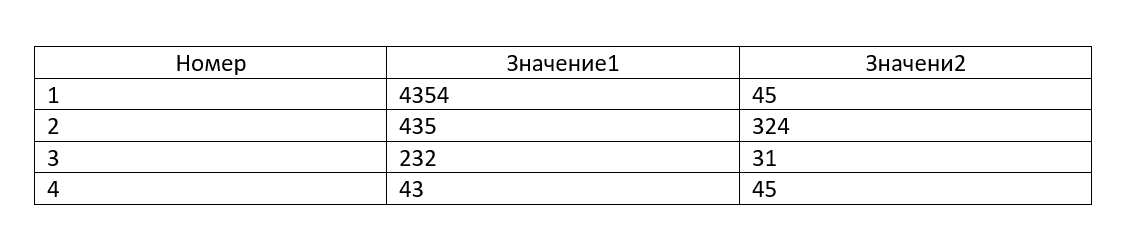

In [9]:
image_table(0)

In [10]:
table = get_table(tables, 0)

['Номер', 'Значение1', 'Значени2']
[['1', '4354', '45'], ['2', '435', '324'], ['3', '232', '31'], ['4', '43', '45']]


In [11]:
print(create_pretty_table(*table))

+-------+-----------+----------+
| Номер | Значение1 | Значени2 |
+-------+-----------+----------+
|   1   |    4354   |    45    |
|   2   |    435    |   324    |
|   3   |    232    |    31    |
|   4   |     43    |    45    |
+-------+-----------+----------+


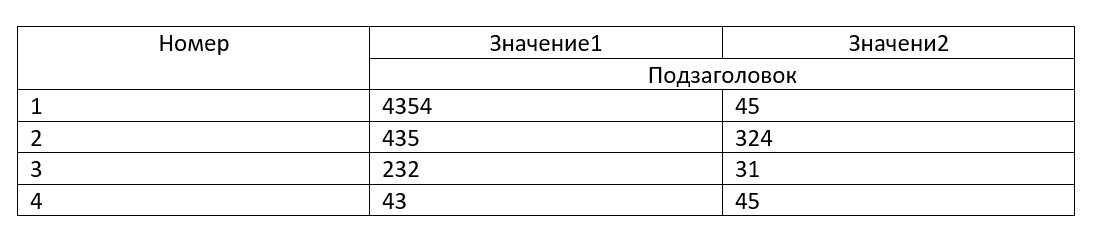

In [12]:
image_table(1)

In [13]:
table = get_table(tables, 1)

['Номер', 'Значение1', 'Значени2']
[['Номер', 'Подзаголовок', 'Подзаголовок'], ['1', '4354', '45'], ['2', '435', '324'], ['3', '232', '31'], ['4', '43', '45']]


In [15]:
print(create_pretty_table(*table))

+-------+--------------+--------------+
| Номер |  Значение1   |   Значени2   |
+-------+--------------+--------------+
| Номер | Подзаголовок | Подзаголовок |
|   1   |     4354     |      45      |
|   2   |     435      |     324      |
|   3   |     232      |      31      |
|   4   |      43      |      45      |
+-------+--------------+--------------+


In [ ]:
create_pretty_table(*table)

'+-------+--------------+--------------+\n| Номер |  Значение1   |   Значени2   |\n+-------+--------------+--------------+\n| Номер | Подзаголовок | Подзаголовок |\n|   1   |     4354     |      45      |\n|   2   |     435      |     324      |\n|   3   |     232      |      31      |\n|   4   |      43      |      45      |\n+-------+--------------+--------------+'